In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [36]:

df = pd.read_csv(r"C:\Users\Yogita Patil\Downloads\Heart_Disease_Prediction.csv")
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [37]:
print("Shape of the dataset:")
print(df.shape)

Shape of the dataset:
(270, 14)


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [39]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


## Target Variable Distribution

In [40]:
print("Heart Disease value counts:")
print(df['Heart Disease'].value_counts())

print("\nPercentage:")
print(df['Heart Disease'].value_counts(normalize=True) * 100)

Heart Disease value counts:
Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

Percentage:
Heart Disease
Absence     55.555556
Presence    44.444444
Name: proportion, dtype: float64


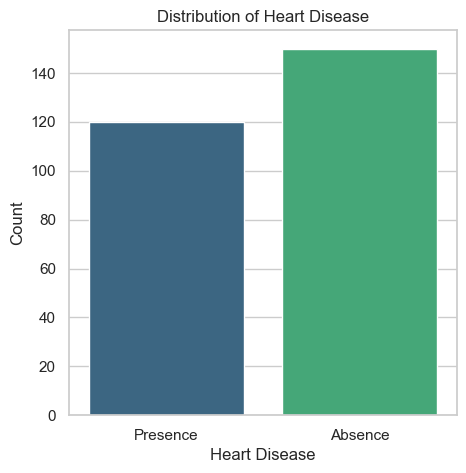

In [41]:
plt.figure(figsize=(5,5))
sns.countplot(x='Heart Disease', data=df, palette='viridis')
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

### Numerical Features Distribution

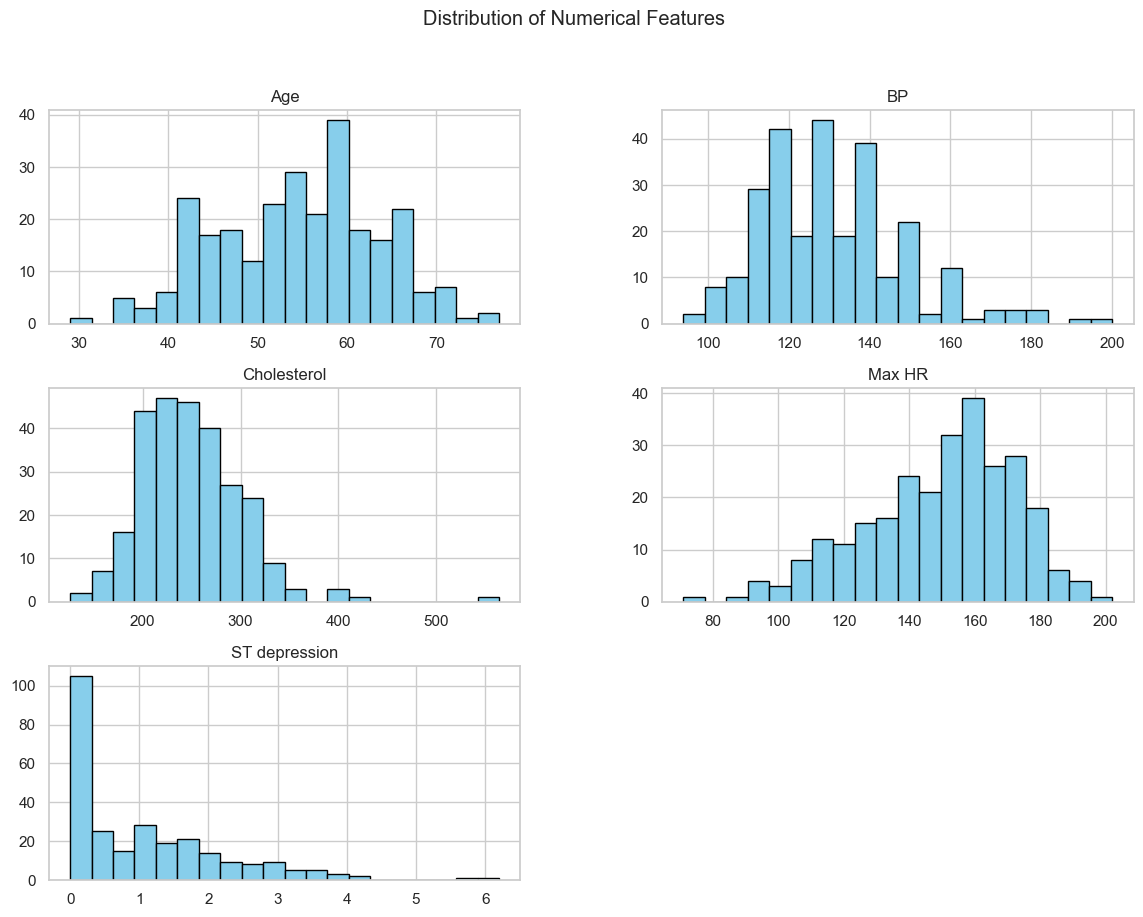

In [42]:
numerical_cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

df[numerical_cols].hist(bins=20, figsize=(14,10), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

### Categorical Features Distribution

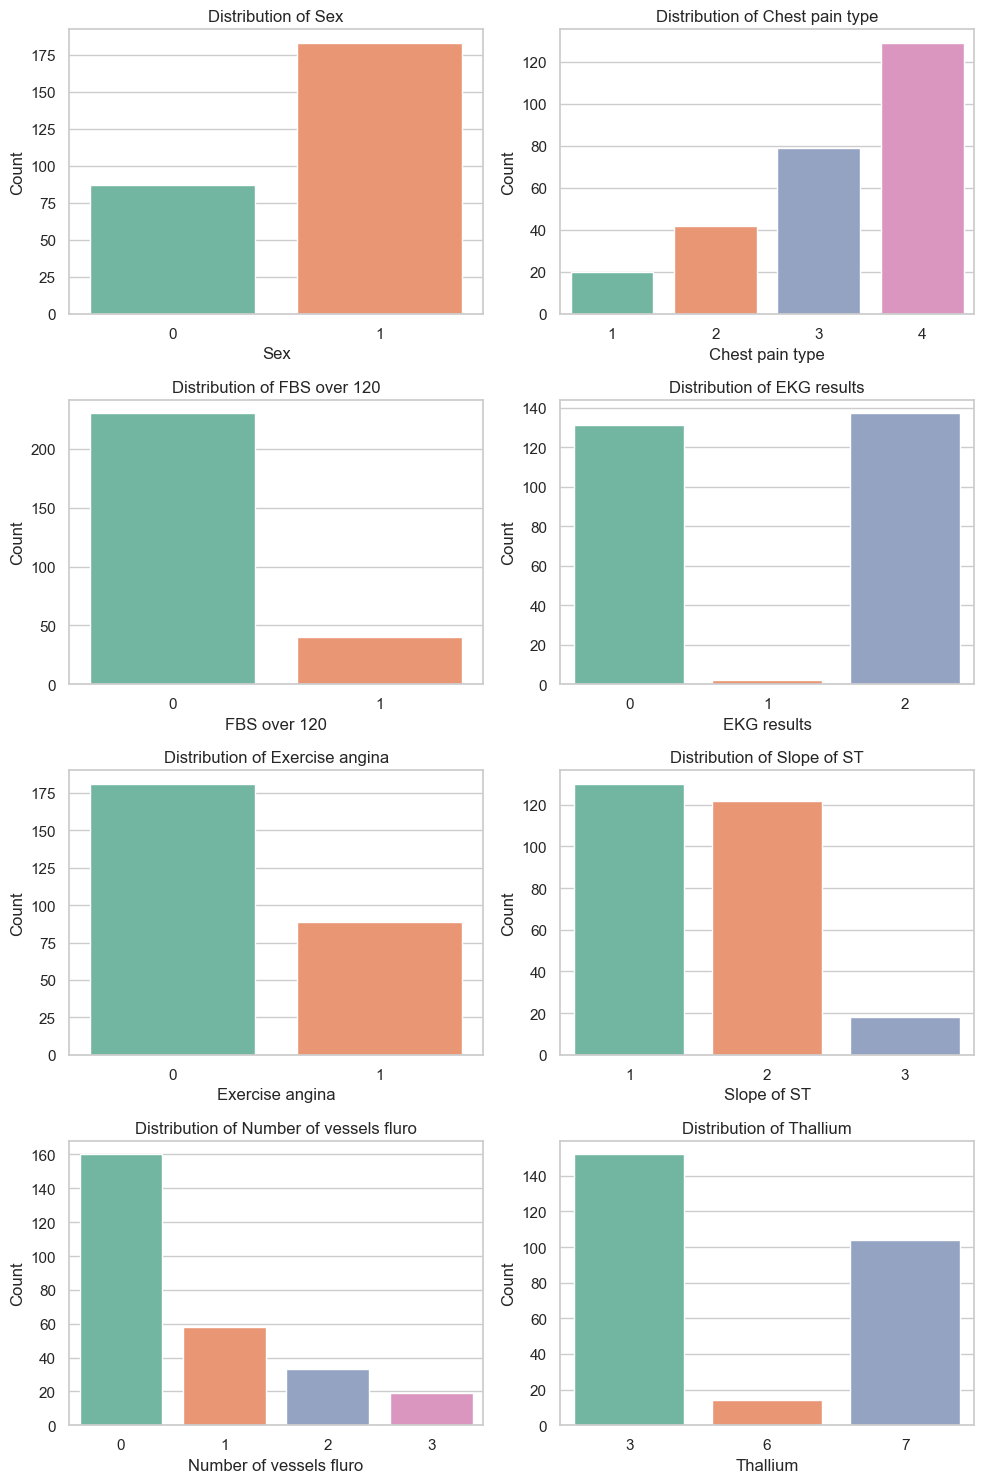

In [43]:
categorical_cols = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 
                    'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium']

fig, axes = plt.subplots(4, 2, figsize=(10, 15))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Age vs Heart Disease

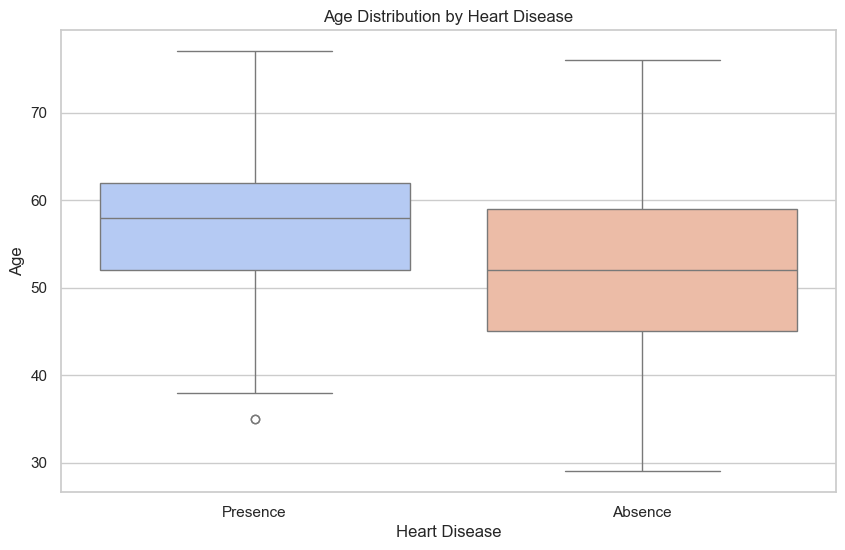

In [44]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Heart Disease', y='Age', data=df, palette='coolwarm')
plt.title('Age Distribution by Heart Disease')
plt.show()

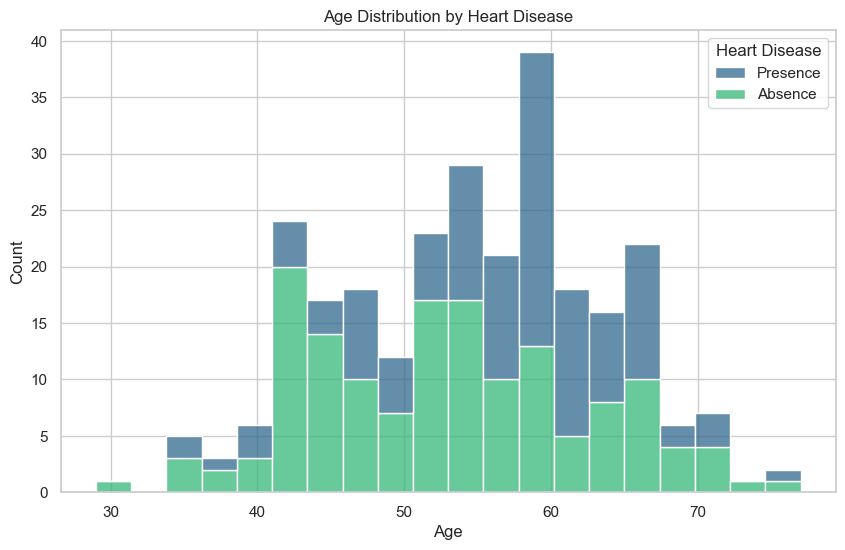

In [45]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', hue='Heart Disease', multiple='stack', bins=20, palette='viridis')
plt.title('Age Distribution by Heart Disease')
plt.show()


### Correlation Heatmap

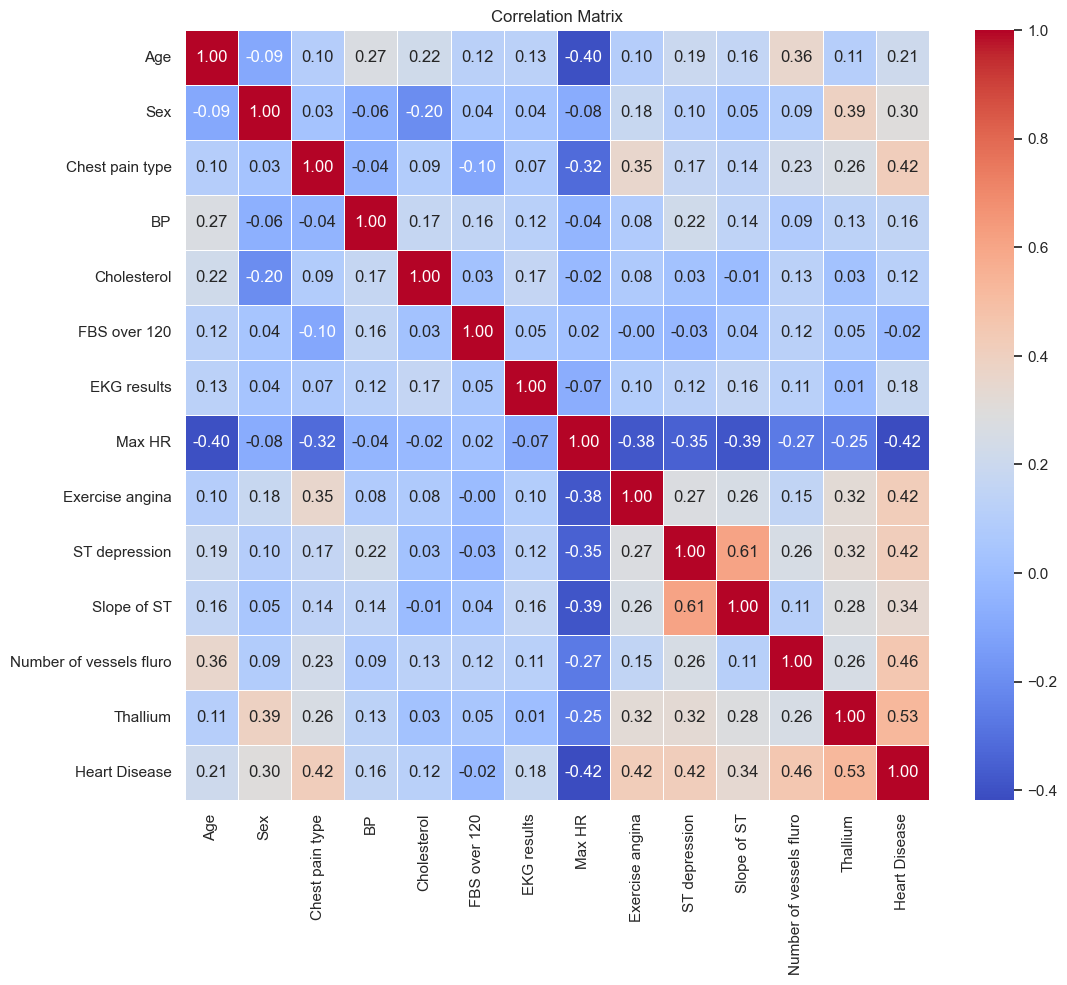

In [46]:
# Encode target for correlation
df_corr = df.copy()
df_corr['Heart Disease'] = df_corr['Heart Disease'].map({'Presence': 1, 'Absence': 0})

plt.figure(figsize=(12,10))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Chest Pain Type vs Heart Disease

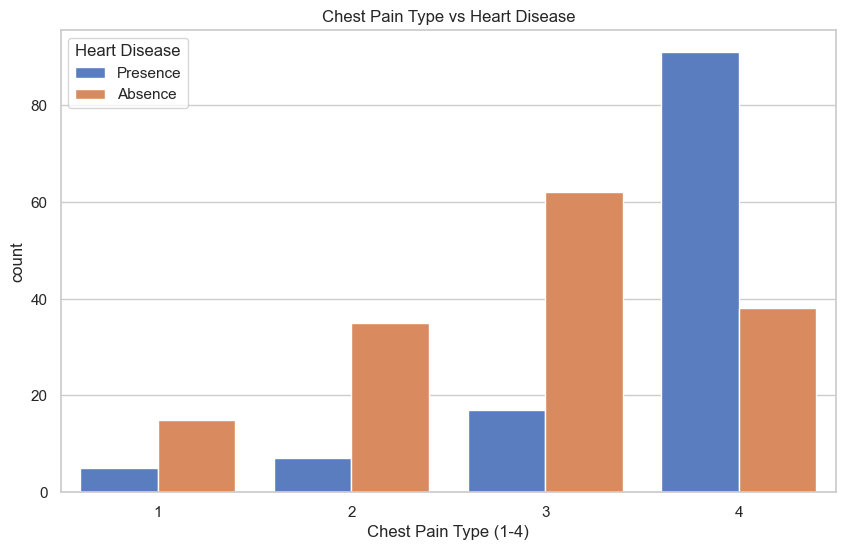

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(x='Chest pain type', hue='Heart Disease', data=df, palette='muted')
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type (1-4)')
plt.show()


### Number of Vessels vs Heart Disease

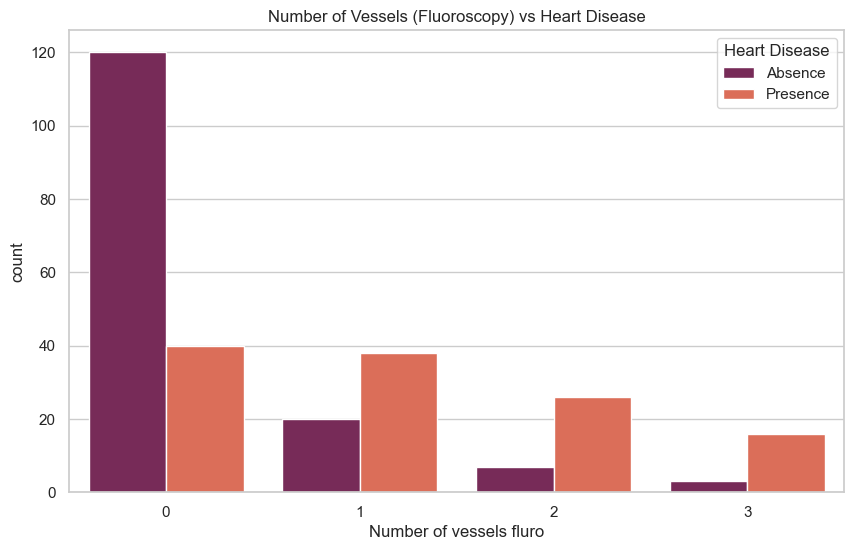

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(x='Number of vessels fluro', hue='Heart Disease', data=df, palette='rocket')
plt.title('Number of Vessels (Fluoroscopy) vs Heart Disease')
plt.show()

### Thallium Test vs Heart Disease

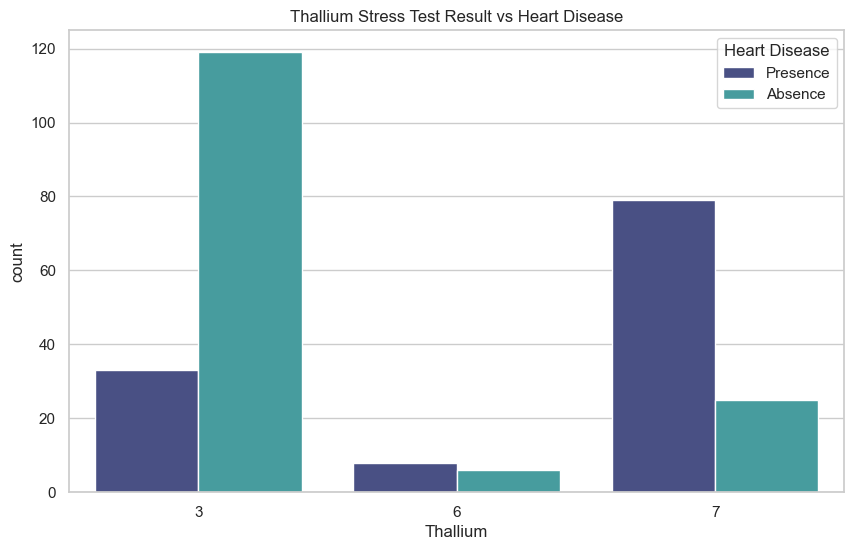

In [49]:
plt.figure(figsize=(10,6))
sns.countplot(x='Thallium', hue='Heart Disease', data=df, palette='mako')
plt.title('Thallium Stress Test Result vs Heart Disease')
plt.show()

## Gender vs Heart Disease

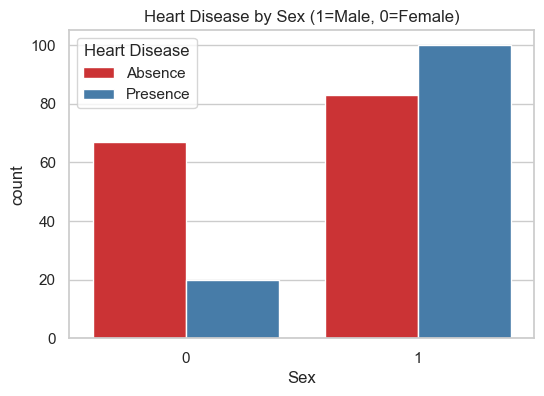

In [51]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Heart Disease', data=df, palette='Set1')
plt.title('Heart Disease by Sex (1=Male, 0=Female)')
plt.xlabel('Sex')
plt.show()

## Max Heart Rate vs Heart Disease

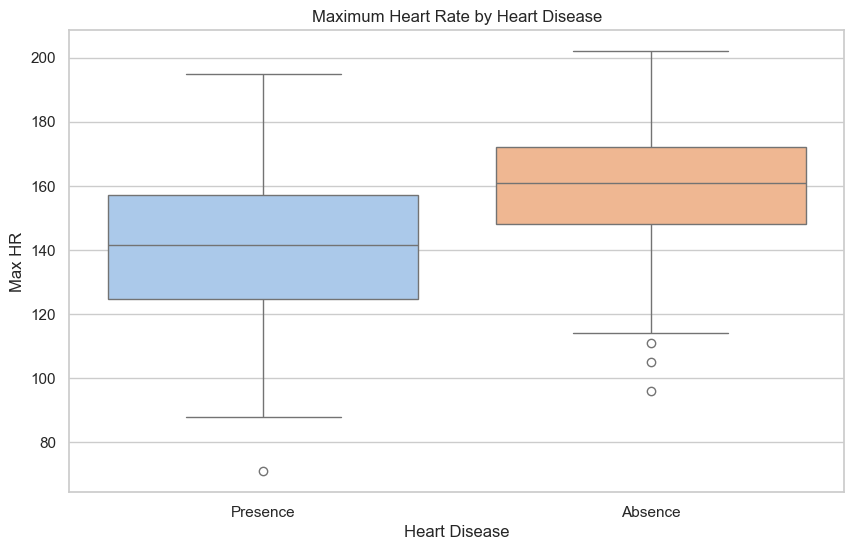

In [52]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Heart Disease', y='Max HR', data=df, palette='pastel')
plt.title('Maximum Heart Rate by Heart Disease')
plt.show()